# Group 40 Project Proposal - Gender Wage Gap Analysis from Glassdoor Dataset

## Introduction

The gender pay gap is the difference between wages earned by men and women. The disparity has long been reported (Bishu & Alkadry, 2016), and many possible reasons have been cited, including the glass ceiling, position, agency segregation and human capital (Alkadry & Tower, 2006). Numerous laws and legislation have been passed in the hope to diminish the disparity. However, Statistics Canada reported that female employees in Ontario earned $0.75 for every dollar earned by men in 2020 (Statistics Canada 2022).
In this report, we would confirm whether women are earning less than men. Our population of interest is employees in North America. The null hypothesis is that men and women earn the same income. We will compare the mean difference in income and standard deviation between men and women. We use the mean, a single number that is the summarization of the entire dataset, and standard deviation measures the variability. To achieve this, we used a dataset generated by scraping Glassdoor. It contains income for various job titles based on gender.



**Dataset**:
* Found using <a href="https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap" target="_blank">this link</a> 

* Dataset is scraped from <a href="https://www.glassdoor.com/" target="_blank">Glassdoor website</a> 



## Preliminary Results

In [1]:
#library needed for this project
library(tidyverse)
library(dplyr)
library(RColorBrewer)
library(tidyr)
library(tidymodels)
library(repr)
library(cowplot)
library(broom)
library(digest)
library(infer)
library(gridExtra)
# install from CRAN
install.packages("kableExtra")
library(knitr)
library(kableExtra)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

### Load data into Jupyter notebook

In [2]:
df <- read_csv("https://raw.githubusercontent.com/kristennli/stat201/main/glassdoor.csv")

Rows: 1000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): JobTitle, Gender, Education, Dept
dbl (5): Age, PerfEval, Seniority, BasePay, Bonus

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The features of the data set are:
* Job Title
* Gender
* Age: age in years
* PerfEval: performance evaluation score
* Education: level of education
* Dept: department
* Seniority: Seniority (No of years worked)
* Base Pay: Annual Basic Pay in USD
* Bonus: Annual Bonus Pay in USD

In [3]:
# display the first 6 rows of the dataset features
head(df)

JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Graphic Designer,Female,18,5,College,Operations,2,42363,9938
Software Engineer,Male,21,5,College,Management,5,108476,11128
Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
IT,Female,20,5,PhD,Operations,4,70890,10126


In [4]:
summary(df %>% select(BasePay,Bonus))

    BasePay           Bonus      
 Min.   : 34208   Min.   : 1703  
 1st Qu.: 76850   1st Qu.: 4850  
 Median : 93328   Median : 6507  
 Mean   : 94473   Mean   : 6467  
 3rd Qu.:111558   3rd Qu.: 8026  
 Max.   :179726   Max.   :11293  

The dataset consists of 1000 samples and 9 features reported by Glassdoor users and there is no missing value. The summary results for BasePay and Bonus indicate that there is a large difference for the two features. The medians and means for the two features are similar, indicating that there is no "outlier" samples in our dataset.

In [5]:
# check for missing values
sum(is.na(df))

[1] 0

In [6]:
nrow(df)

[1] 1000

### EDA

Figure 1 shows that men and women are fairly balanced in the dataset.

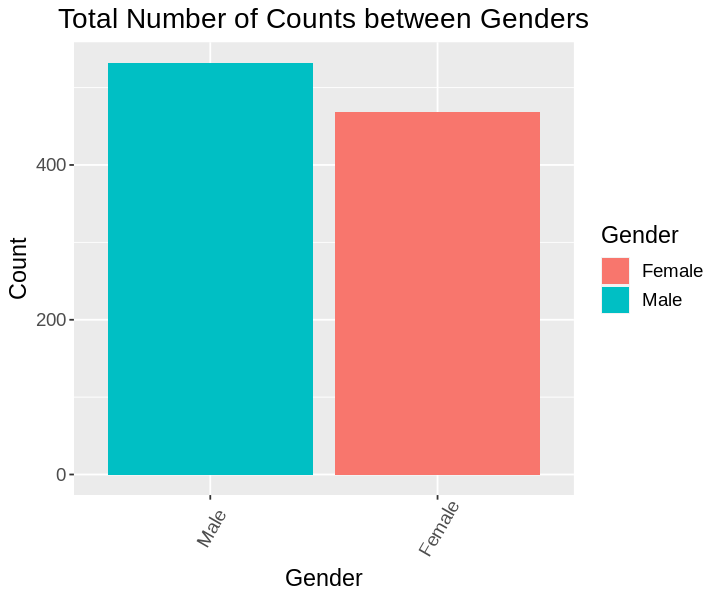

In [7]:
options(repr.plot.width = 6, repr.plot.height = 5)

# check class imbalance
gender_pop <- df %>%
    group_by(Gender) %>%
    summarise(n=n())%>%
    arrange(desc(n))

# plot the total counts of samples for the 2 genders
gender_pop <- gender_pop%>%
  ggplot(aes(x = reorder(Gender, -n), y = n, fill = Gender))+
  geom_bar(stat = 'identity')+
  labs(x = "Gender",
       y = "Count", 
       fill = "Gender",
       title = "Total Number of Counts between Genders")+
  scale_color_brewer(palette = "Set3")+
  theme(axis.text.x = element_text(angle = 60, vjust = 0.6, hjust=0.5), 
        text = element_text(size = 14))+
  theme(plot.title = element_text(hjust = 0.5))


gender_pop

<font color='grey'>Figure 1: Sample Counts between Genders.</font>

### Feature engineering

In [8]:
# add a new column "income" to the dataframe to reflect the individual's annual salary
df_new <- df %>%
    mutate(income = BasePay + Bonus)
head(df_new)

JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,income
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783
IT,Female,20,5,PhD,Operations,4,70890,10126,81016


<font color='grey'> Table 1. Columns of the new dataframe.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



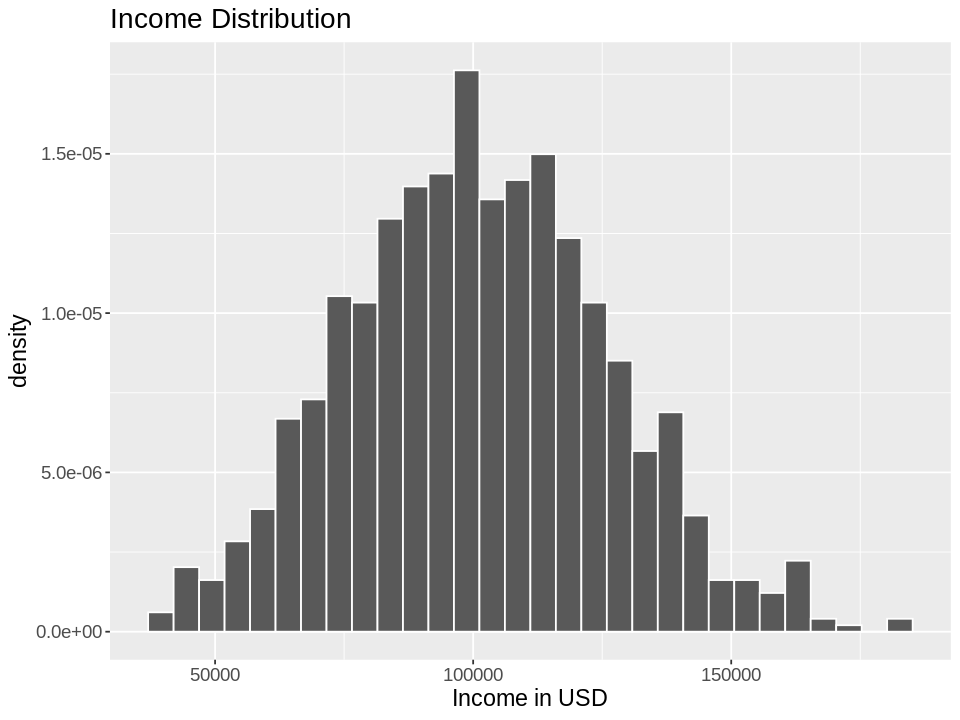

In [9]:
# check if income distribution is Normal distribution
options(repr.plot.width = 8, repr.plot.height = 6)

income_plot <- df_new %>%  
    ggplot() +
    geom_histogram(aes(income, y = ..density..), color = 'white') +
    ggtitle("Income Distribution") +
    xlab("Income in USD")+
    theme(text = element_text(size = 14))

income_plot

<font color='grey'> Figure 2. Income distribution.

The 'income' appears to be symmetrical, bell-shaped and unimodal, showing that the distribution of income is Normal distribution.

## Methods: Plan

This report is trustworthy because we establish that the dataset it uses is an effective and reliable source through the EDA, where we determine that it is large, has an equal representation of men and women, and the income distribution is Normal distribution. Furthermore, by using the difference in means between men and women incomes, we will highlight any differences in wage trends between the two genders.

 
Due to sampling variation, hypothesis testing is necessary to assess plausibility. Moreover, it is not feasible to know the population income difference and the population standard deviation, which consists of all men and women in North America. Therefore, the sample standard deviation is used instead. 

A non-traditional method (bootstrapping) and traditional method (two sample t-test) are preformed and their respective p-values and confidence intervals are computed to quantify the the errors of the difference between  $\mu_1$ and $\mu_2$. Lastly, we compare the p-value with the pre-specified significance level ($\alpha$ = 5%) to whether or not to reject the null hypothesis. 

### Hypothesis
We use the average income difference as a point estimate. 

- Null hypothesis: There is no difference in income between males and females ($H_0: \mu_F - \mu_M = 0$, where $\mu_M$ is the mean income of men and $\mu_F$ is the mean income of women).

- Alternative hypothesis: There is differences in income between males and females ($H_1: \mu_F - \mu_M \neq 0$) 

### Significance level: $\alpha$
The significance level is 5%.

According to Statistics Canada’s report, the gender wage gap persists. We expect the data to reject the null hypothesis, showing that men and women do not earn the same income. The analysis is reproducible since we provide detailed code annotation and use set.seeds() to control the randomness.

In [10]:
inc_summ <- df_new %>%
  group_by(Gender) %>%
  summarize(
    sample_size = n(),
    mean = mean(income),
    variance= var(income),
    sd = sd(income),
    minimum = min(income),
    lower_quartile = quantile(income, 0.25),
    median = median(income),
    upper_quartile = quantile(income, 0.75),
    max = max(income)
  )

inc_summ
# adapted from Moderndive

Gender,sample_size,mean,variance,sd,minimum,lower_quartile,median,upper_quartile,max
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Female,468,96416.83,585744427,24202.16,40828,80866.50,96571.0,112660.5,168968
Male,532,104918.68,641586946,25329.57,41030,87791.75,105100.5,121617.0,184010


<font color='grey'> Table 2. Statistical summary for female and male.

<br>
<br>


Before conducting any statistical analysis, we use boxplot to see if a difference exists in the mean income of the two levels of the explanatory variable.

The boxplot below also shows the mean for each group highlighted by the red dots.

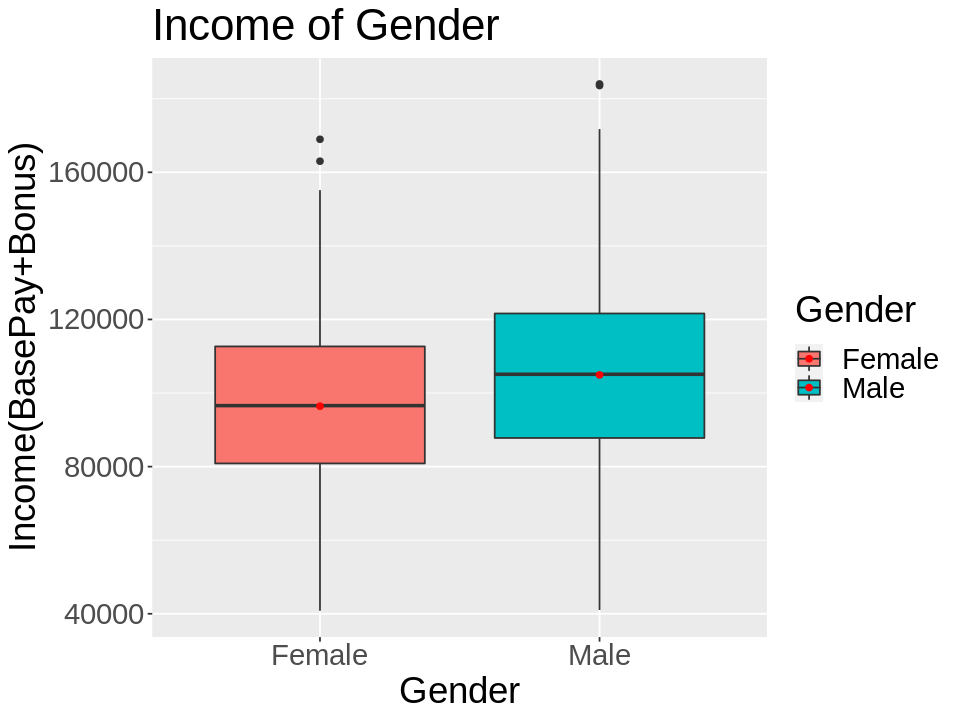

In [11]:
female_male_boxplots <-
    ggplot(df_new, aes(x=Gender,y=income, fill = Gender)) +
    geom_boxplot() +
    stat_summary(fun = "mean", geom = "point", color = "red")+
    theme(text = element_text(size = 22)) +
    ggtitle('Income of Gender') + 
    xlab('Gender') + 
    ylab('Income(BasePay+Bonus)')
female_male_boxplots

<font color='grey'> Figure 3. Boxplot of income distribution.

Based solely on the boxplot, the male have slightly higher income. But we have to always keep in mind that we only have a sample of the incomes and not all existing incomes of male and female.

## Non-traditional methods (Bootstrapping)

### Observed statistic


In [12]:
d_hat <- df_new %>%
  specify(income ~ Gender) %>%
  calculate(
    stat = "diff in means",
    order = c("Female", "Male")
  )
d_hat

stat
<dbl>
-8501.847


Our goal is to see if the observed sample mean of female wages, which is 96416.83, is statistically different than the male average wage of 104918.68. In other words, we want to test the hypothesis $\bar X_F - \bar X_M \neq 0$ and see if such a case is statistically likely. To do this, we can use bootstrapping, where we take random samples from the population with replacement to estimate the sampling distribution and with that determine measures of accuracy such as the confidence interval and p-value for our hypothesis testing.

In [13]:
set.seed(123)
null_distn_two_means <- df_new %>%
  specify(income ~ Gender) %>%
  hypothesize(null = "independence") %>%
  generate(type = "permute", reps = 10000) %>%
  calculate(
    stat = "diff in means",
    order = c("Female", "Male")
  )

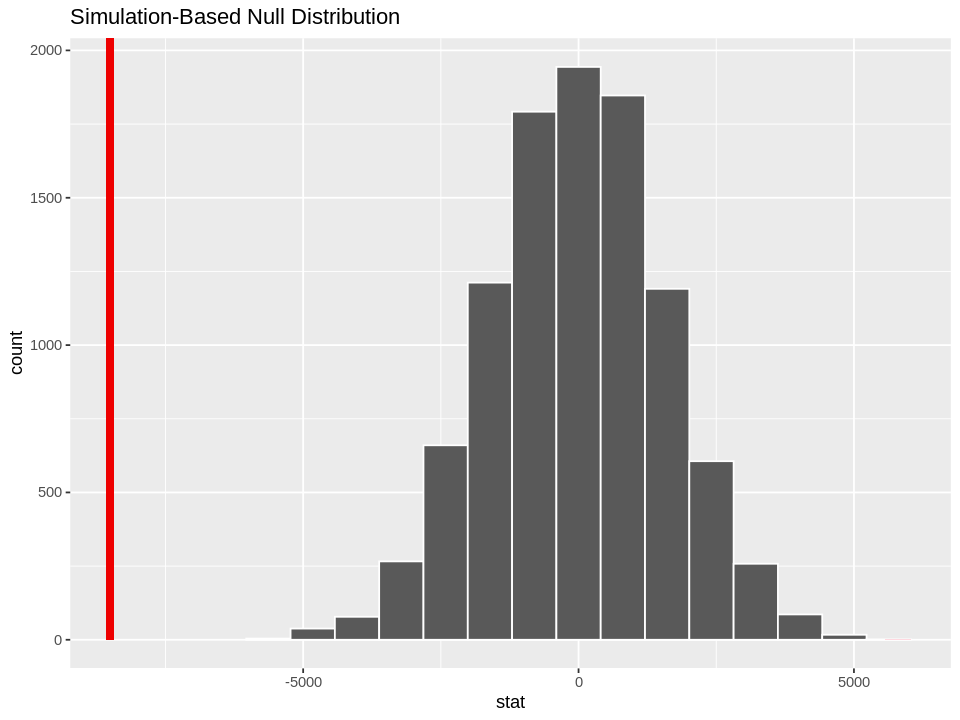

In [14]:
null_distn_two_means %>%
  visualize() +
  shade_p_value(obs_stat = d_hat, direction = "both")

<font color='grey'> Figure 4. Null distribution of the two means with the p-value highlighted in the red line.

### Calculate p-value

In [15]:
pvalue <- null_distn_two_means %>%
  get_pvalue(obs_stat = d_hat, direction = "both")
pvalue

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


The generated p_value is 0 with the current level of precision, however, this suggests that making a Type I error is extremely low. Hence, given that we are using 10000 repetitions to calculate the sample: p-value is < 0.0001. We reject the null hypothesis at the 5% level.

### Bootstrapping for 95% confidence interval
Here we will examine the 95% confidence interval of our bootstrap distribution to see if it contains the difference of means of our null hypothesis: 0.

In [16]:
set.seed(123)
boot_distn_two_means <- df_new %>%
  specify(income ~ Gender) %>%
  generate(type = "bootstrap", reps = 10000) %>%
  calculate(
    stat = "diff in means",
    order = c("Female", "Male")
  )
ci <- boot_distn_two_means %>%
  get_ci(level = 0.95)

ci

lower_ci,upper_ci
<dbl>,<dbl>
-11571.56,-5405.877


<font color='grey'> Table 3. Lower and upper-CI of 95% confidence interval.

We are 95% confident the true mean income for females is between 5406 dollars 11572 smaller than for males.
    

In [17]:
b_summary <- tibble(p_value = 0.0001, lower_ci = -11571.56, upper_ci = -5405.877, method = "bootstrap")
b_summary

p_value,lower_ci,upper_ci,method
<dbl>,<dbl>,<dbl>,<chr>
1e-04,-11571.56,-5405.877,bootstrap


<font color='grey'> Table 4. Statistical summary of bootstrap method.

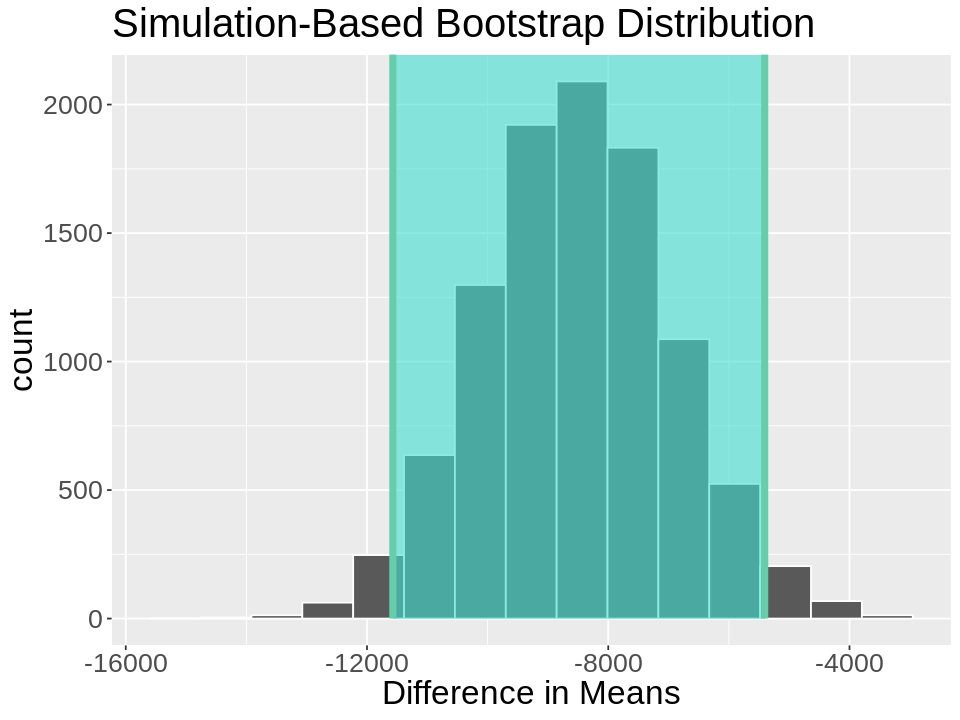

In [18]:
boot_distn_two_means %>%
  visualize() +
  shade_ci(endpoints = ci)+ 
    theme(text = element_text(size = 20)) + 
    xlab("Difference in Means")


<font color='grey'> Figure 5. Bootstrap distribution of the difference in means.

From the boostrap distribution of the two sample mean, we can see that 0 is not contained in this confidence interval as a plausible value of $\mu_F − \mu_M$. This matches with our hypothesis test results of rejecting the null hypothesis. Since zero is not a plausible value of the population parameter, we have evidence that females' incomes are different than males' incomes.

<br>
<br>

## Traditional methods: two-sampled t test

In order to use the theoretical approach, we need to check if the following conditions are met:

1. Independent observations: the data from the dataset was gathered in a random and unbiased fashion. Since individuals were categorized as either male or female the two are mutually exclusive so no datapoints will occur in each category.
2. Approximately normal: the distribution of the response for each group is normal and the sample sizes are more than 30.
3. Independent samples: the samples were obtained using a random sampling method.
4. Homogeneity of Variances: The variances of male and female average wages are quite similar (585744427 vs 641586946), so the condition holds.

Hence, the above conditions are met and a two-sample t test is preformed.

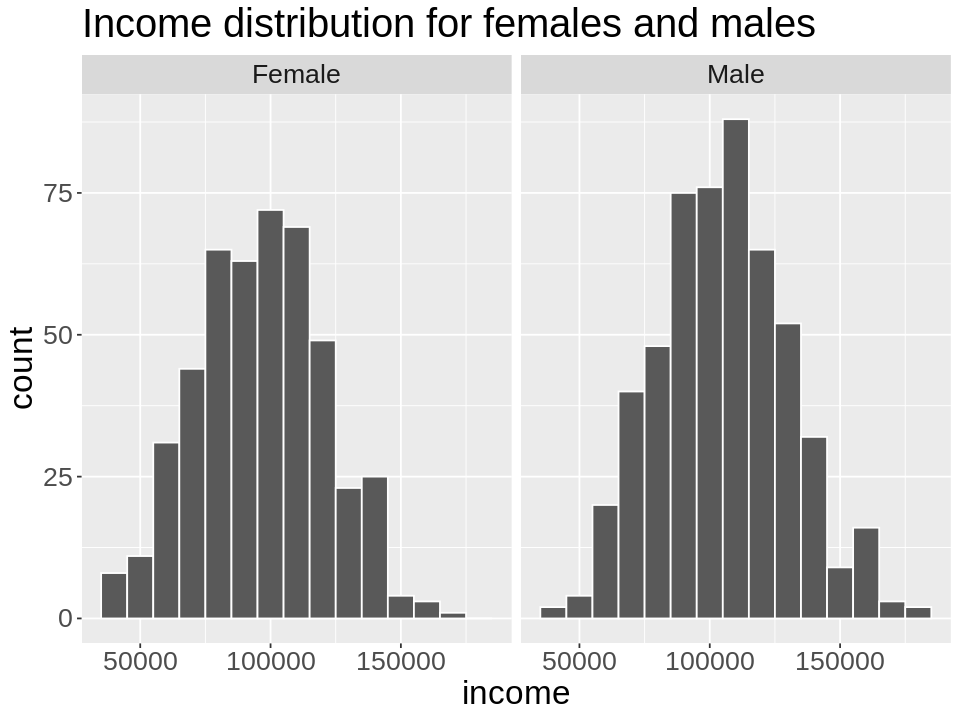

In [19]:
ggplot(df_new, aes(x = income)) +
    geom_histogram(color = "white", binwidth = 10000) +
    theme(text = element_text(size = 20)) + 
    facet_wrap(~Gender)+
    ggtitle("Income distribution for females and males")

<font color='grey'> Figure 6. Income distribution for females and males.

### Test statistic
We use the t distribution to standardize the difference in sample means ($\bar X_F - \bar X_M$) using the approximate standard error of $\bar X_F - \bar X_M$

$$
T = \frac{\bar{x}_{\text{F}} - \bar{x}_{\text{M}}}{\sqrt{\frac{s^2_{\text{F}}}{n_F}+\frac{s^2_{\text{M}}}{n_M}}}
$$ where $n_F = 468$, and $n_M = 532$.

#### observed test statistic

In [20]:
#sample mean, sample standard deviation, number of each sample
female_male_summary <- 
     df_new %>% 
     group_by(Gender) %>% 
     summarise(sample_mean = mean(income), 
               sample_var = var(income), 
               n = n())

xm<-female_male_summary$sample_mean[2]
sm<-female_male_summary$sample_var[2]
nm<-female_male_summary$n[2]

xf<-female_male_summary$sample_mean[1]
sf<-female_male_summary$sample_var[1]
nf<-female_male_summary$n[1]

# test statistic
test_statistic <- 
   (xf - xm) / sqrt(sf/nf+sm/nm)
                                                                                    
# test_statistic

#degrees of freedom
v<-(sm^2/nm+sf^2/nf)^2/(sm^4/(nm^2*(nm-1))+sf^4/(nf^2*(nf-1)))

# v

# p_value
p_value <- 2*pt(v,df=nm+nf-2,lower.tail= FALSE)
# p_value

cat("The observed test statistic is", round(test_statistic,4),".",
    "\nThe degree of freedom is", round(v,4),".", 
    "\nThe computed p value is", round(p_value,4),". However, we can never assume that Type I error will never occur, therefore, the next smallest p value based on our sample size (1000) is 0.001.")




The observed test statistic is -5.4232 . 
The degree of freedom is 996.618 . 
The computed p value is 0 . However, we can never assume that Type I error will never occur, therefore, the next smallest p value based on our sample size (1000) is 0.001.

In [21]:
male<-df_new %>%
        filter(Gender=='Male') %>%
        select(income)

female<-df_new %>%
        filter(Gender=='Female') %>%
        select(income)

t_test_func <- 
    tidy(
        t.test(x = female,
               y = male,
               alternative = 'two.sided'))
t_test_func

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-8501.847,96416.83,104918.7,-5.423247,7.354186e-08,991.1957,-11578.18,-5425.519,Welch Two Sample t-test,two.sided


<font color='grey'> Table 5. Summary of the t test.

Based on the t-test, the computed p value is 7.354E-08. At a 5% significance level, we reject the null-hypothesis that the average incomes of male and female have no difference.

According to Figure 4 and Figure 6, the bootstrap distribution and the null distributed created are very similar, therefore, it makes sense that the results are similar for traditional and non-traditional methods in terms of p-values and their respective confidence intervals(Table 4 and Table 5). The conditions for using the t distribution are met, therefore, using any of the methods will lead to similar results and they are equally trustworthy.

## Discussion
Based on both the bootstrapping method and the two-sample t test, we have sufficient evidence to reject the null hypothesis. The boxplot assumption that there is a difference in the means is backed up by the statistical anlysis. In conclusion, the true mean income differs between males and females based on this data.

We found that there is a difference in income between females and males through traditional and non-tradiational methods. The results were what we expected to find. The finding re-enforces that the gender wage gap is indeed present, and there is still much more the society and the government should change and implement to diminish the gap.

The confirmation of the persistence of the gender wage gap can lead to future questions, such as what factors affect the wage difference or potential ways to lessen the disparity.

## References

Alkadry, M.G. and Tower, L.E. (2006), Unequal Pay: The Role of Gender. Public Administration Review, 66: 888-898. https://doi.org/10.1111/j.1540-6210.2006.00656.x

Bishu, S. G., & Alkadry, M. G. (2017). A Systematic Review of the Gender Pay Gap and Factors That Predict It. Administration & Society, 49(1), 65–104. https://doi.org/10.1177/0095399716636928

Kim, A. Y. and Ismay, C. and Kuhn, M. (2021) Take a moderndive into introductory linear regression with R Journal of Open Source Education. 4(41), 115 https://doi.org/10.21105/jose.00115

Statistics Canada. (2022). Table 14-10-0324-01 Average and median gender pay ratio in annual wages, salaries and commissions [Data table]. https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410032401&pickMembers%5b0%5d=1.8&cubeTimeFrame.startYear=2015&cubeTimeFrame.endYear=2019&referencePeriods=20150101%2c20190101